# Calculation Detail  for P_29 Score

### Taking the updated df1 as an example, which has undergone data deletion under the Privacy-preserving Processing Module but has not be applied the Local DP.

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance
from collections import defaultdict
from scipy.stats import wasserstein_distance


# Read the CSV file into a DataFrame
df = pd.read_csv('df1-filter.csv')

df.head()



,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Male,[30-40),1,Home,Other,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
1,Caucasian,Male,[40-50),1,Home,Other,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,Caucasian,Male,[50-60),1,Home,Referral,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
3,Caucasian,Male,[60-70),1,Home,Referral,4,70,1,21,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[70-80),1,Home,Other,5,73,0,12,...,No,No,No,No,No,No,No,No,Yes,>30


#### We define ['race', 'gender', 'age'] as quasi-identifiers;
['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'readmitted'] as sensitive attributes. 

#### The equation for calculating the P_29 score is δk×δl×δt×{wk×(1−Nk′)+wl×Nl′+wt×(1−Nt′)}, kindly please refer to the complete formulation below or on page 6 of my thesis.

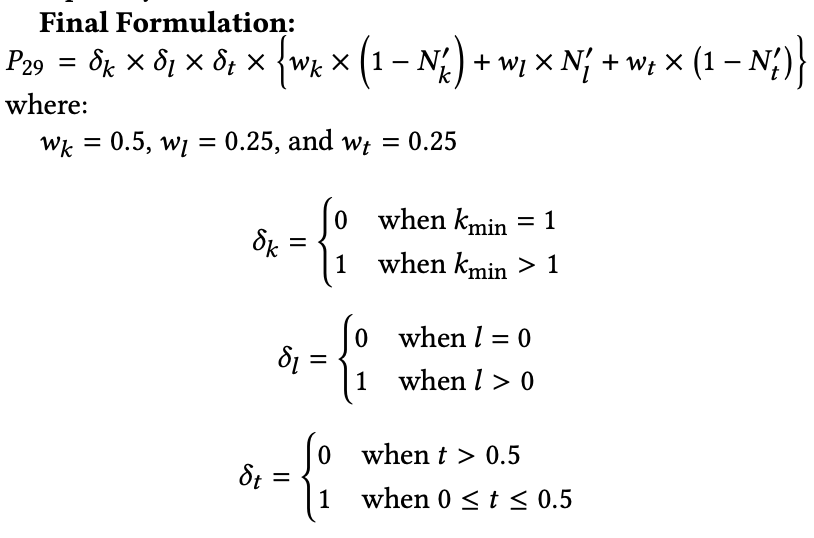

In [57]:
# Quasi-identifiers and sensitive attributes
quasi_identifiers = ['race', 'gender', 'age']
sensitive_attributes = ['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'readmitted']


## Calculate k_anonymity and normalized entropy l-diversity

In [58]:

# Function to calculate k-anonymity
def calculate_k_anonymity(group):
    return len(group)

# Function to calculate normalized entropy l-diversity for a column
def calculate_normalized_entropy(series):
    # Handle empty series
    if series.empty:
        return 0

    value_counts = series.value_counts(normalize=True)
    total_entropy = 0
    
    for count in value_counts:
        if count > 0:
            total_entropy -= count * np.log2(count)
    
    # Normalize the entropy by the log2 of the number of unique values
    unique_values = series.nunique()
    
    if unique_values == 1:
        return 0
    
    normalized_entropy = total_entropy / np.log2(unique_values)
    return normalized_entropy

# Initialize results dictionary
results = defaultdict(list)

# Group by quasi-identifiers and calculate metrics
grouped = df.groupby(quasi_identifiers)
for name, group in grouped:
    # Calculate k-anonymity
    k_anonymity = calculate_k_anonymity(group)
    
    # Calculate normalized entropy l-diversity for each sensitive attribute
    for attribute in sensitive_attributes:
        normalized_entropy = calculate_normalized_entropy(group[attribute])
        results[f'Normalized Entropy l-diversity_{attribute}'].append(normalized_entropy)
        
    # Append k value and quasi-identifiers combination for this group
    quasi_identifier_values = ', '.join(f"{qi}: {group[qi].iloc[0]}" for qi in quasi_identifiers)
    results['Quasi-identifiers'].append(quasi_identifier_values)
    results['k-anonymity'].append(k_anonymity)

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Print the df which tells me the calculated k_value, l_value for each sensitive attributes in each EC
print("\nResults DataFrame:")
results_df



Results DataFrame:


,Normalized Entropy l-diversity_diag_1,Normalized Entropy l-diversity_diag_2,Normalized Entropy l-diversity_diag_3,Normalized Entropy l-diversity_max_glu_serum,Normalized Entropy l-diversity_A1Cresult,Normalized Entropy l-diversity_readmitted,Quasi-identifiers,k-anonymity
0,0.774974,0.744782,0.754702,0.080875,0.525621,0.836904,"race: AfricanAmerican, gender: Female, age: [3...",750
1,0.800054,0.740319,0.760331,0.115360,0.474670,0.867076,"race: AfricanAmerican, gender: Female, age: [4...",1547
2,0.826443,0.773739,0.771467,0.073586,0.486961,0.840232,"race: AfricanAmerican, gender: Female, age: [5...",2457
3,0.827115,0.760154,0.770731,0.085473,0.397894,0.864260,"race: AfricanAmerican, gender: Female, age: [6...",2429
4,0.809295,0.764972,0.758071,0.103420,0.414324,0.873549,"race: AfricanAmerican, gender: Female, age: [7...",2450
...,...,...,...,...,...,...,...,...
58,0.819201,0.772333,0.757737,0.073818,0.595990,0.734433,"race: Other, gender: Male, age: [40-50)",219
59,0.805380,0.798205,0.754742,0.118068,0.527140,0.710331,"race: Other, gender: Male, age: [50-60)",377
60,0.846133,0.824172,0.819581,0.118190,0.498431,0.779368,"race: Other, gender: Male, age: [60-70)",500
61,0.794882,0.767981,0.766405,0.143413,0.448960,0.795071,"race: Other, gender: Male, age: [70-80)",445


In [59]:
# Extract columns containing 'k-anonyminity'
k_value = results_df[['Quasi-identifiers', 'k-anonymity']].copy()

# Extract columns containing 'Normalized Entropy l-diversity'
l_value_columns = ['Quasi-identifiers'] + [col for col in results_df.columns if col.startswith('Normalized Entropy l-diversity')]

l_value = results_df[l_value_columns].copy()


## Calculation for Nk′:
### Among all the ECs, the EC with the smallest record contains 13 records. Therefore, kmin is 13. Nk′ is calculated as 1/kmin, resulting in 1/13.

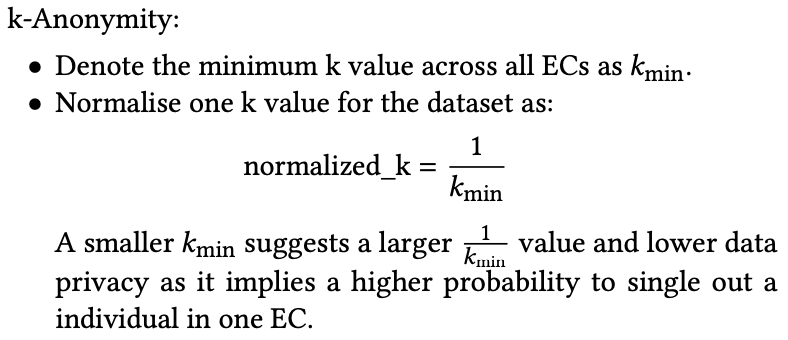


In [49]:
# Finding the smallest value in the 'k-anonymity' column
k_min = results_df['k-anonymity'].min()
print("kmin:", k_min)
print("Nk′ is calculated as 1/kmin:", 1/k_min)

kmin: 13
Nk′ is calculated as 1/kmin: 0.07692307692307693


## Calculation for Nl′ :
### The normalized entropy l of a sensitive attribute is the mean of the normalized entropy l of that attribute across each EC: 

diag_1: 0.816539; diag_2: 0.777670; diag_3: 0.771016; max_glu_serum: 0.198358; A1Cresult: 0.499301; readmitted: 0.818425. 

### The final l values, denoted as Nl′, are the mean of these normalized entropy l values across all sensitive attributes: 

Nl′=0.816539+0.777670+0.771016+0.198358+0.499301+0.8184256=0.646885Nl′=60.816539+0.777670+0.771016+0.198358+0.499301+0.818425=0.646885

### This is the explaination for Nl′ Calculation:

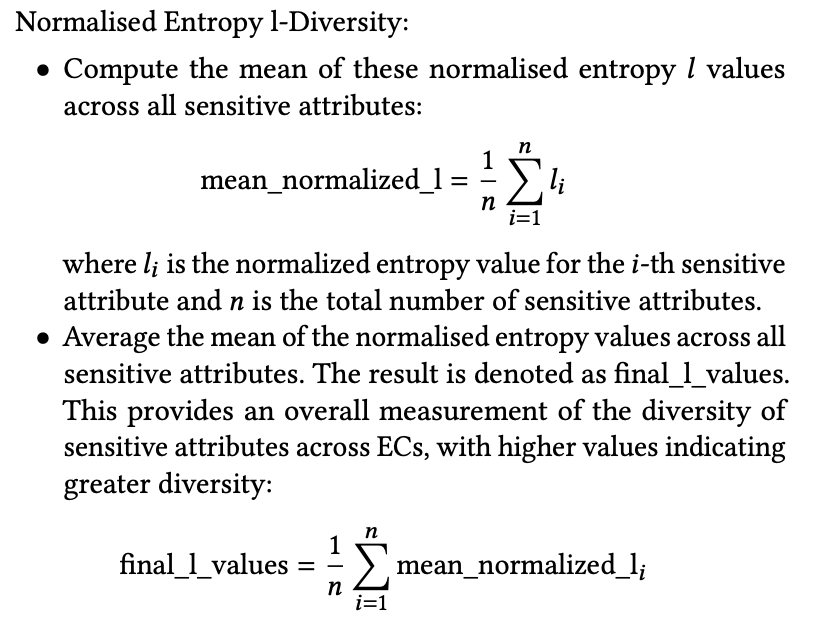

In [20]:
column_means = l_value.iloc[:, 1:].mean()
print("The mean of the normalized entropy l of that attribute across each EC:")
print(column_means)

normalized_l_value = column_means.mean()
print("Nl′as the mean of these normalized entropy l values across all sensitive attributes:")
print(normalized_l_value)

The mean of the normalized entropy l of that attribute across each EC:
Normalized Entropy l-diversity_diag_1           0.816539
Normalized Entropy l-diversity_diag_2           0.777670
Normalized Entropy l-diversity_diag_3           0.771016
Normalized Entropy l-diversity_max_glu_serum    0.198358
Normalized Entropy l-diversity_A1Cresult        0.499301
Normalized Entropy l-diversity_readmitted       0.818425
dtype: float64
Nl′as the mean of these normalized entropy l values across all sensitive attributes:
0.6468849936894951


## Calculate t-closeness

#### First, we compute the global distribution of the values in all sensitive attributes. Then, we calculate the local distribution of these values within each EC. For computing t-closeness, we calculate the variational distance between aforementioned local distribution and the global distribution. The variational distance is computed as half the sum of the absolute differences between the local and global probabilities of each sensitive attributes’ value.



In [22]:
# This is the function to calculate t-closeness


def calculate_t_closeness(df, quasi_identifiers, sensitive_attributes):
    """
    Calculate t-closeness for sensitive attributes in a DataFrame grouped by quasi-identifiers using variational distance.
    
    Parameters:
    - df: DataFrame containing quasi-identifiers and sensitive attribute columns.
    - quasi_identifiers: List of column names (quasi-identifiers) in df.
    - sensitive_attributes: List of column names (sensitive attributes) in df.
    
    Returns:
    - DataFrame with t-closeness values for each group of quasi-identifiers and sensitive attributes.
    """
    results = []
    
    # Group by quasi-identifiers and calculate t-closeness for each group
    grouped = df.groupby(quasi_identifiers)
    
    # Calculate global distribution Q for each sensitive attribute
    global_distributions = {}
    for attribute in sensitive_attributes:
        global_distributions[attribute] = calculate_global_distribution(df[attribute])
    
    for group_name, group_df in grouped:
        # Calculate t-closeness for each sensitive attribute in the group
        t_closeness_values = {}
        
        for attribute in sensitive_attributes:
            series = group_df[attribute]
            t_closeness = compute_t_closeness(series, global_distributions[attribute])
            t_closeness_values[f't-closeness_{attribute}'] = t_closeness
        
        # Store the results for this group
        group_result = {
            'Quasi-identifiers': ', '.join(f"{qi}: {value}" for qi, value in zip(quasi_identifiers, group_name)),
            **t_closeness_values
        }
        results.append(group_result)
    
    # Create a DataFrame from results and return
    results_df = pd.DataFrame(results)
    return results_df

def calculate_global_distribution(series):
    """
    Calculate the global distribution Q for a single categorical attribute series.
    
    Parameters:
    - series: Pandas Series representing the attribute values.
    
    Returns:
    - Dictionary representing the global distribution Q.
      Keys are attribute values (categories), values are probabilities.
    """
    class_distribution = series.value_counts(normalize=True)
    global_distribution = class_distribution.to_dict()
    return global_distribution

def compute_t_closeness(series, global_distribution):
    """
    Compute t-closeness using the variational distance for a single categorical attribute series.
    
    Parameters:
    - series: Pandas Series representing the attribute values.
    - global_distribution: Dictionary representing the global distribution Q for the specific attribute.
                           Keys are attribute values (categories), values are probabilities.
    
    Returns:
    - t_closeness: Float, t-closeness value for the series with respect to global_distribution.
    """
    class_distribution = series.value_counts(normalize=True)
    combined_index = list(global_distribution.keys())
    class_distribution = class_distribution.reindex(combined_index, fill_value=0)
    
    p_values = class_distribution.values
    q_values = np.array([global_distribution.get(k, 0) for k in combined_index])
    
    t_closeness = 0.5 * np.sum(np.abs(p_values - q_values))
    return t_closeness

# Example usage:
# List of quasi-identifiers and sensitive attribute names
quasi_identifiers = ['race', 'gender', 'age']
sensitive_attributes = ['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'readmitted']

# Calculate t-closeness for each group of quasi-identifiers
t_value = calculate_t_closeness(df, quasi_identifiers, sensitive_attributes)

# Display the results DataFrame
print("T-closeness results:")


t_value

T-closeness results:


,Quasi-identifiers,t-closeness_diag_1,t-closeness_diag_2,t-closeness_diag_3,t-closeness_max_glu_serum,t-closeness_A1Cresult,t-closeness_readmitted
0,"race: AfricanAmerican, gender: Female, age: [3...",0.303572,0.238707,0.184423,0.034396,0.074785,0.044816
1,"race: AfricanAmerican, gender: Female, age: [4...",0.156351,0.140655,0.078049,0.024683,0.038327,0.007943
2,"race: AfricanAmerican, gender: Female, age: [5...",0.044066,0.041732,0.024380,0.036376,0.041248,0.017997
3,"race: AfricanAmerican, gender: Female, age: [6...",0.035150,0.060127,0.048147,0.033302,0.022644,0.016276
4,"race: AfricanAmerican, gender: Female, age: [7...",0.069166,0.049878,0.063289,0.027757,0.020375,0.011250
...,...,...,...,...,...,...,...
58,"race: Other, gender: Male, age: [40-50)",0.148696,0.197396,0.136719,0.039364,0.101809,0.160779
59,"race: Other, gender: Male, age: [50-60)",0.085488,0.098287,0.099438,0.023885,0.073724,0.151804
60,"race: Other, gender: Male, age: [60-70)",0.070874,0.083153,0.082875,0.023063,0.037748,0.090149
61,"race: Other, gender: Male, age: [70-80)",0.120149,0.117597,0.088735,0.014861,0.011622,0.080126


### Using the “readmitted” attribute in the EC consisting of individuals who are African American females aged between 30 and 40, as an example:

In [25]:
# Initialize the above function to calculate global distributions for all sensitive attributes
# Filter the DataFrame to get the specific equivalence class
global_distributions = {attr: calculate_global_distribution(df[attr]) for attr in sensitive_attributes}

ec_df = df[(df['race'] == 'AfricanAmerican') & 
           (df['gender'] == 'Female') & 
           (df['age'] == '[30-40)')]

# Calculate local distributions for all sensitive attributes in our sample equivalence class
local_distributions = {attr: ec_df[attr].value_counts(normalize=True).to_dict() for attr in sensitive_attributes}

# Display the results
print("Global Distributions:")
for attr, dist in global_distributions.items():
    print(f"{attr}: {dist}")

print("\nClass Distributions for EC (race: AfricanAmerican, gender: Female, age: [30-40)):")
for attr, dist in local_distributions.items():
    print(f"{attr}: {dist}")

Global Distributions:
diag_1: {'circulatory': 0.3054541431574289, 'other': 0.24745295638093515, 'respiratory': 0.1434490943286164, 'digestive': 0.09403695099015377, 'injury': 0.069305735751139, 'genitourinary': 0.05060897726015549, 'musculoskeletal': 0.049663579036297256, 'neoplasms': 0.034366231180038016, 'pregnancy': 0.0035100423417715153, 'diabetes': 0.002152289573464482}
diag_2: {'circulatory': 0.31924287682668034, 'other': 0.31869977571935754, 'respiratory': 0.10856993432499573, 'genitourinary': 0.08302406742499673, 'diabetes': 0.06004284464291102, 'digestive': 0.040913616751651935, 'neoplasms': 0.02553580947208561, 'injury': 0.024087539852558106, 'musculoskeletal': 0.01765078598799143, 'pregnancy': 0.0022327489967715656}
diag_3: {'other': 0.3357471160325458, 'circulatory': 0.30337225557935815, 'diabetes': 0.12470204869806596, 'respiratory': 0.07299681179535146, 'genitourinary': 0.06618793309798952, 'digestive': 0.038379144917478805, 'injury': 0.019270031882046484, 'musculoskeleta

### From abrove we can tell:

The global distribution of values in the ‘readmitted’ column: 'NO' is 0.5378511299520261; '>30' is 0.3505415924931358; '<30' is 0.1116072775548381.

The local distribution of values in the ‘readmitted’ column in this EC: 'NO' is 0.5826666666666667; '>30' is 0.308; '<30' is 0.10933333333333334.



In [52]:
# Absolute differences
abs_diff = np.abs(np.array([0.5826666666666667, 0.308, 0.10933333333333334]) - 
                  np.array([0.5378511299520261, 0.3505415924931358, 0.1116072775548381]))
print("Absolute differences:", abs_diff)

# Sum of absolute differences
sum_abs_diff = np.sum(abs_diff)
print("Sum of absolute differences:", sum_abs_diff)

# t-closeness calculation
t_closeness = 0.5 * sum_abs_diff
print("t-closeness of ‘readmitted’ column in this EC :", t_closeness)

Absolute differences: [0.04481554 0.04254159 0.00227394]
Sum of absolute differences: 0.08963107342928114
t-closeness of ‘readmitted’ column in this EC : 0.04481553671464057


This t_value for the ‘readmitted’ column in this EC can be verified in the above t_value DataFrame.

## Normalization of t Value
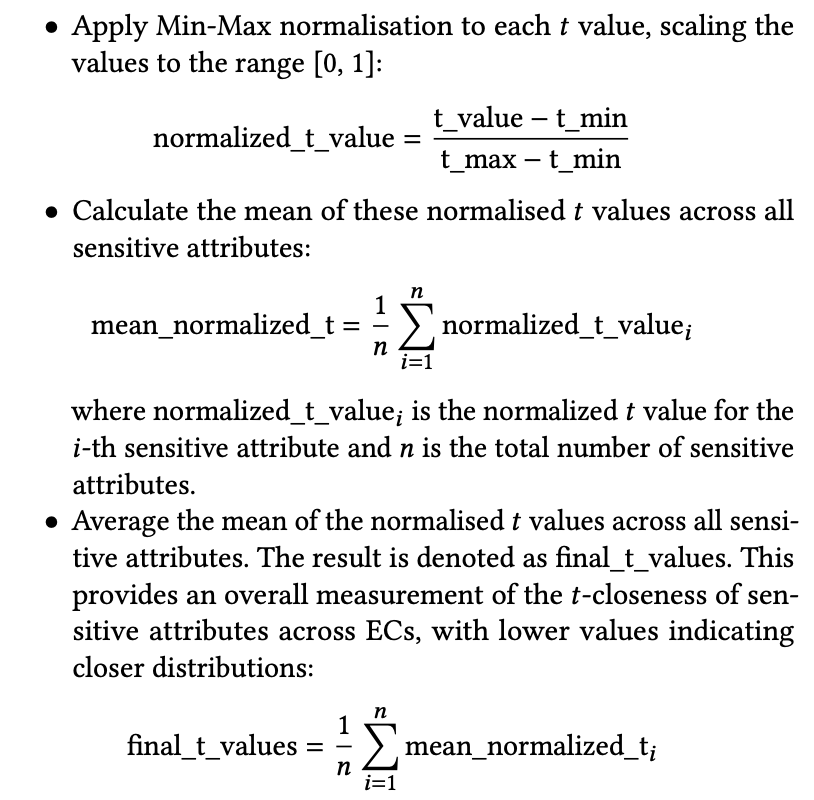

### Apply min-max normalization to t value to scale it between 0 and 1:
    
the maximum t value of  ‘readmitted’ across the EC is 0.24786315576225965, and the minimum value is 0.00559306543589707. 

We got the normalized t value for ‘readmitted’ in this EC is:
    
(0.04481553671414059−0.00559306543589707)/(0.24786315576225965−0.00559306543589707)=0.161857


In [38]:
# Finding the max and min values in the 't-closeness_readmitted' column
max_t_closeness_readmitted = t_value['t-closeness_readmitted'].max()
min_t_closeness_readmitted = t_value['t-closeness_readmitted'].min()

max_t_closeness_readmitted, min_t_closeness_readmitted



(0.24786315576225965, 0.00559306543589707)

In [39]:
normalized_t_value=(t_closeness- min_t_closeness_readmitted)/(max_t_closeness_readmitted-min_t_closeness_readmitted)
normalized_t_value

0.16189563980393462

### Calculation of Normalized t Values for Each Attribute:
    
We calculate the mean of normalized t value of each sensitive attribute across ECs: 

normalised t value for diag_1 is 0.263849, for diag_2 is 0.287875, for diag_3is 0.354814, for max_glu_serum is 0.220297, for A1Cresult is 0.219628, for readmitted is 0.273022




In [53]:
t_value_normalized = t_value.copy()
for column in t_value.columns[1:]:
        min_val = t_value[column].min()
        max_val = t_value[column].max()
        t_value_normalized[column] = (t_value[column] - min_val) / (max_val - min_val)
    
# Step 5: Compute the overall normalized t value for the dataset
normalized_t_value = t_value_normalized.iloc[:, 1:].mean()
normalized_t_value

t-closeness_diag_1           0.263849
t-closeness_diag_2           0.287875
t-closeness_diag_3           0.354814
t-closeness_max_glu_serum    0.220297
t-closeness_A1Cresult        0.219628
t-closeness_readmitted       0.273022
dtype: float64

### Calculation of Normalized t Value for the whole dataset:
    
The final t values, denoted as Nt′, is the mean of normalized t values for each sensitive attribute: 
    
Nt′=(0.263849+0.287875+0.354814+0.220297+0.219628+0.2730226)/6=0.269914

In [54]:
# Step 5: Compute the overall normalized t value for the dataset
final_t_value = normalized_t_value.mean()
final_t_value

0.26991424066830283

## Calculate P_29 Score

#### For δk, δl, and δt, since the kmin is greater than 1, the normalized entropy l of each sensitive attribute in each EC is greater than 0, and the t value of each sensitive attribute in each EC is less than 0.5, these three values all equal 1.

#### δk×δl×δt×{wk×(1−Nk′)+wl×Nl′+wt×(1−Nt′)}= 1×1×1×{0.5×(1−1/13)+0.25×0.6468849936894951+0.25×(1−0.269914)}=0.805781


In [55]:
#calculate P_29 Score

def calculate_P_29_score(k_value, l_value, t_value, w_k=0.5, w_l=0.25, w_t=0.25):
    reasons = []
    problematic_info = []
    
    # Step 1: Calculate the minimum k-anonymity value
    k_min = k_value['k-anonymity'].min()
    
    # Step 2: Check conditions to set joint privacy score to 0
    if k_min == 1:
        reasons.append("k-anonymity is 1")
        problematic_rows = k_value[k_value['k-anonymity'] == 1]['Quasi-identifiers'].tolist()
        problematic_info.extend([(row, "k-anonymity is 1") for row in problematic_rows])
    
    if l_value.iloc[:, 1:].eq(0).any().any():
        reasons.append("normalized entropy l-value is 0 for some attribute")
        for col in l_value.columns[1:]:
            problematic_rows = l_value[l_value[col] == 0]['Quasi-identifiers'].tolist()
            problematic_info.extend([(row, f"normalized entropy l-value is 0 for {col}") for row in problematic_rows])
    
    if (t_value.iloc[:, 1:].astype(float) > 0.5).any().any():
        reasons.append("t-value exceeds 0.5 for some attribute")
        for col in t_value.columns[1:]:
            if t_value[col].dtype != 'object':  # Skip columns with non-numeric values
                problematic_rows = t_value[t_value[col].astype(float) > 0.5]['Quasi-identifiers'].tolist()
                problematic_info.extend([(row, f"t-value exceeds 0.5 for {col}") for row in problematic_rows])
    
    if k_min == 1 or l_value.iloc[:, 1:].eq(0).any().any() or (t_value.iloc[:, 1:].astype(float) > 0.5).any().any():
        return 0.0, problematic_info, reasons, k_min, l_value.iloc[:, 1:].min().min(), t_value.iloc[:, 1:].max().max()
    
    # Step 3: Compute the mean normalized entropy l value for each sensitive attribute across all equivalence classes
    column_means = l_value.iloc[:, 1:].mean()
    normalized_l_value = column_means.mean()
    
    # Step 4: Normalize the t values across columns
    t_value_normalized = t_value.copy()
    for column in t_value.columns[1:]:
        min_val = t_value[column].min()
        max_val = t_value[column].max()
        t_value_normalized[column] = (t_value[column] - min_val) / (max_val - min_val)
    
    # Step 5: Compute the overall normalized t value for the dataset
    normalized_t_value = t_value_normalized.iloc[:, 1:].mean().mean()
    
    # Step 6: Calculate P_29
    P_29_score = w_k * (1 - (1 / k_min)) + w_l * normalized_l_value + w_t * (1 - normalized_t_value)
    
    return P_29_score, problematic_info, reasons, k_min, l_value.iloc[:, 1:].min().min(), t_value.iloc[:, 1:].max().max()


# Sample call to calculate P_29 score
P_29_score, problematic_info, reasons, k_min, min_l_value, max_t_value = calculate_P_29_score(k_value, l_value, t_value)

print("P_29 Score:", P_29_score)
print("Reasons:", reasons)
print("Problematic Information:")
for info in problematic_info:
    print(f"Problem in {info[0]} due to {info[1]}")
print("Minimum k-anonymity:", k_min)
print("Minimum normalized l-value:", min_l_value)
print("Maximum t-value:", max_t_value)


P_29 Score: 0.8057811497937597
Reasons: []
Problematic Information:
Minimum k-anonymity: 13
Minimum normalized l-value: 0.07358616908386309
Maximum t-value: 0.4997312970313503
